Notebook de prueba para intentar descubrir el motivo del ValueError

In [2]:
# importem les llibreries necesàries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#link amb la descripció de les dades: https://docs.microsoft.com/en-us/machine-learning-server/r-reference/revoscaler/airlinedata87to08

# un cop descarregat el fitxer, el carreguem a un DataFrame:
delay_df = pd.read_csv(r'..\DB\DelayedFlights.csv')

pd.set_option('display.max_columns', None) #mostrem totes les columnes

# imprimim la taula (les 5 primeres i les 5 últimes files):
delay_df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
delay_df_short = delay_df.head(100000) #Creem un dataframe més petit per probar el codi
#delay_df_short amb 10859 files funciona, amb 10860: valueerror
delay_df_short[['ArrDelay', 'DepDelay']].tail(10)

,ArrDelay,DepDelay
99990,3.0,7.0
99991,7.0,11.0
99992,54.0,63.0
99993,10.0,6.0
99994,28.0,34.0
99995,25.0,40.0
99996,-2.0,7.0
99997,4.0,22.0
99998,-7.0,21.0
99999,20.0,27.0


In [8]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16, 'figure.figsize': (8, 6)}) # set font and plot size to be larger

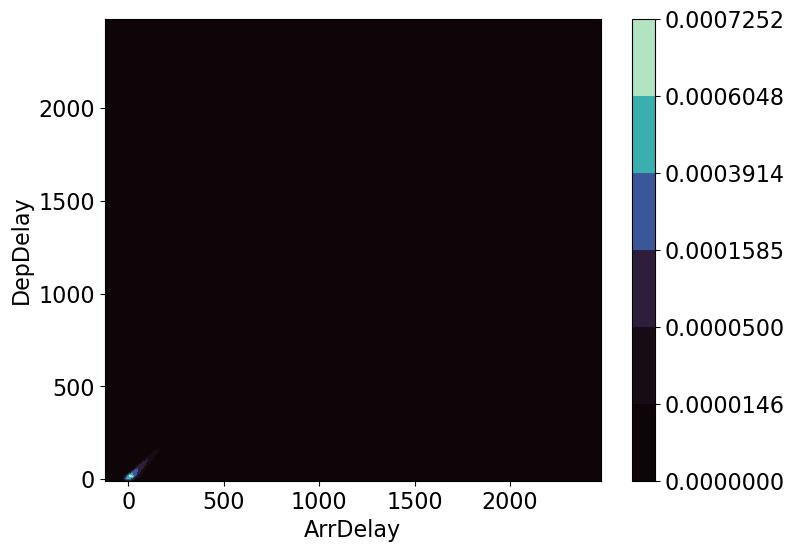

In [10]:
levels=[0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
fig = sns.kdeplot(data = delay_df, 
            x = "ArrDelay", y = "DepDelay", 
            fill=True, thresh=0, levels=levels, cmap="mako", cbar = True)
plt.show()
fig.figure.savefig(r'Plots\Prueba_2DDensity_Plot.png')